# Teaching notebook
Explore $2$ and $20\mathrm{M}_\odot$ [MESA](http://mesa.sourceforge.net) stellar evolution models.

This notebook analyzes two [MESA](http://mesa.sourceforge.net) stellar evolution tracks with both `history_data` and `profile_data` files. It uses the [NuGridPy](http://nugridpy.phys.uvic.ca) tools, especially the `mesa.py` module.

This notebook demonstrates the essential commands to do basic plots of stellar evolution. The goal is to find fully convective pre-main sequence models and to 
1. check how well their EOS is prepresented by an ideal gas
2. integrate an adiabatic polytrope and compare to the stellar evolution model

In [1]:
from nugridpy import mesa as ms
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
nugrid_data_dir='/data/nugrid_vos'
m2_dir=nugrid_data_dir+'/data/teaching/mesa/m2.00z2.0e-2/LOGS'
m20_dir=nugrid_data_dir+'/data/teaching/mesa/m20.0z2.0e-2/LOGS'

In [3]:
s2=ms.star_log(m2_dir)
s20=ms.star_log(m20_dir)

Using old star.logsa file ...
 reading ...100% 

Using old star.logsa file ...
 reading ...100% 



<IPython.core.display.Javascript object>


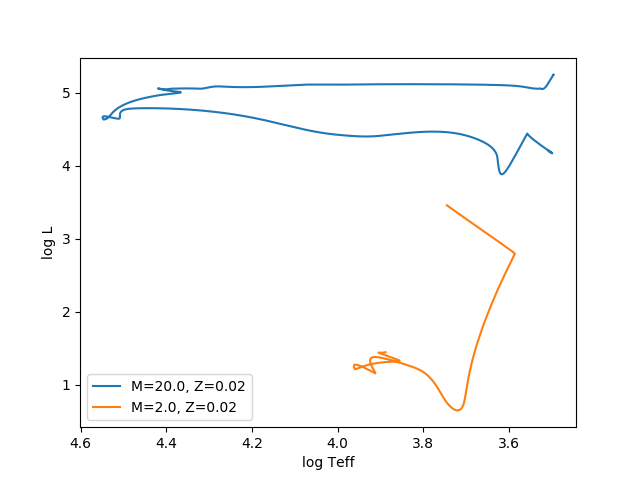

In [4]:
ifig=1; figure(ifig)
s20.hrd_new()
s2.hrd_new()

In [5]:
# what colums are available in this history data instance?
s2.cols

{'burn_c': 59,
 'burn_n': 60,
 'burn_o': 61,
 'center_c12': 50,
 'center_h1': 48,
 'center_he4': 49,
 'center_mu': 46,
 'center_o16': 51,
 'center_ye': 47,
 'cno': 57,
 'conv_mx1_bot': 9,
 'conv_mx1_top': 8,
 'conv_mx2_bot': 11,
 'conv_mx2_top': 10,
 'delta_mass': 4,
 'envelope_mass': 32,
 'epsnuc_M_1': 16,
 'epsnuc_M_2': 17,
 'epsnuc_M_3': 18,
 'epsnuc_M_4': 19,
 'epsnuc_M_5': 20,
 'epsnuc_M_6': 21,
 'epsnuc_M_7': 22,
 'epsnuc_M_8': 23,
 'gravity': 42,
 'h1_boundary_lgRho': 27,
 'h1_boundary_lgT': 26,
 'h1_boundary_mass': 24,
 'h1_boundary_radius': 25,
 'he4_boundary_lgRho': 31,
 'he4_boundary_lgT': 30,
 'he4_boundary_mass': 28,
 'he4_boundary_radius': 29,
 'log_L': 39,
 'log_LH': 33,
 'log_LHe': 34,
 'log_LZ': 35,
 'log_Lnuc': 36,
 'log_R': 40,
 'log_Teff': 37,
 'log_abs_mdot': 5,
 'log_center_P': 45,
 'log_center_Rho': 44,
 'log_center_T': 43,
 'log_dt': 6,
 'log_g': 41,
 'luminosity': 38,
 'model_number': 1,
 'mx1_bot': 13,
 'mx1_top': 12,
 'mx2_bot': 15,
 'mx2_top': 14,
 'num_back

<IPython.core.display.Javascript object>


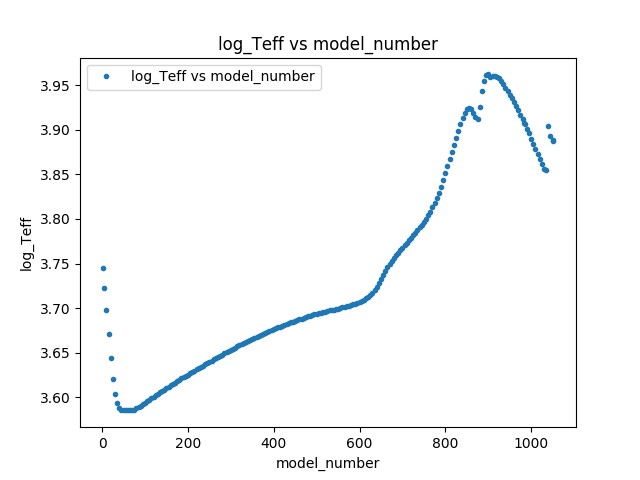

In [6]:
# plot any of these against any other
ifig=2; figure(ifig)     # start new figure
s2.plot('model_number','log_Teff')

In [7]:
!ls /data/nugrid_vos/data/teaching/mesa/m2.00z2.0e-2/LOGS/log5.data 

/data/nugrid_vos/data/teaching/mesa/m2.00z2.0e-2/LOGS/log5.data


In [8]:
# after you found a profile you are interested in, e.g. a fully 
# convective pre-main sequence model you may create a profile instance
# for a model number
p2=ms.mesa_profile(m2_dir,400)

25 in profiles.index file ...
Found and load nearest profile for cycle 400
reading /data/nugrid_vos/data/teaching/mesa/m2.00z2.0e-2/LOGS/log9.data ...
 reading ...100% 



In [9]:
# and again you may ask what columns are available
p2.cols

{'abar': 31,
 'burn_ar': 76,
 'burn_c': 68,
 'burn_ca': 77,
 'burn_cr': 79,
 'burn_fe': 80,
 'burn_mg': 73,
 'burn_n': 69,
 'burn_na': 72,
 'burn_ne': 71,
 'burn_o': 70,
 'burn_s': 75,
 'burn_si': 74,
 'burn_ti': 78,
 'c12': 60,
 'c12_c12': 81,
 'c12_o16': 82,
 'cno': 66,
 'conv_vel_div_csound': 41,
 'csound': 14,
 'dlnT_dt': 47,
 'dlnd_dt': 46,
 'dq_ratio': 19,
 'entropy': 12,
 'eps_grav': 7,
 'eps_nuc': 34,
 'eta': 16,
 'free_e': 30,
 'gradT': 44,
 'gradT_sub_grada': 38,
 'grada': 29,
 'gradr': 45,
 'h1': 57,
 'he3': 58,
 'he4': 59,
 'logP': 4,
 'logPgas': 28,
 'logR': 5,
 'logRho': 3,
 'logT': 2,
 'log_D_mix': 39,
 'log_conv_vel': 40,
 'log_mlt_D_mix': 42,
 'log_opacity': 33,
 'logdq': 18,
 'logtau': 25,
 'logxm': 53,
 'logxq': 52,
 'luminosity': 6,
 'mass': 50,
 'mg24': 64,
 'mixing_type': 13,
 'mlt_mixing_length': 36,
 'mlt_mixing_type': 37,
 'mmid': 51,
 'mu': 17,
 'n14': 61,
 'ne20': 63,
 'net_energy': 9,
 'non_nuc_neu': 35,
 'o16': 62,
 'o16_o16': 83,
 'other': 86,
 'pgas_div_p

<IPython.core.display.Javascript object>


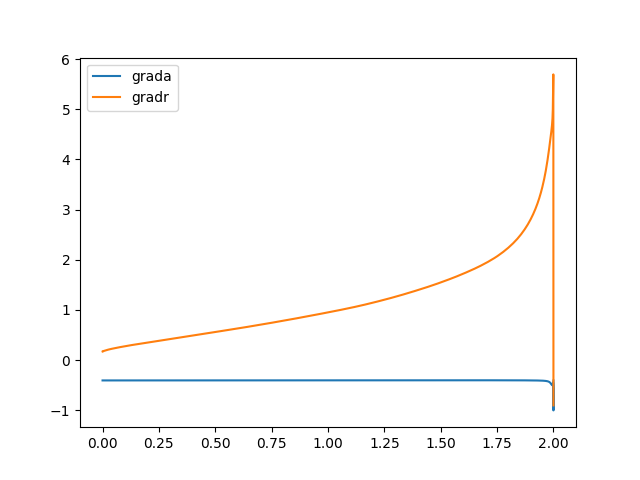

In [10]:
# let's verify that indeed this model is fully convective by plotting the
# radiative and adiabatic temperature gradient against each other
ifig=3; figure(ifig)
grada=p2.get('grada')
gradr=p2.get('gradr')
mass=p2.get('mass')
plot(mass,log10(grada),label='grada')
plot(mass,log10(gradr),label='gradr')
legend(loc=2)

<IPython.core.display.Javascript object>


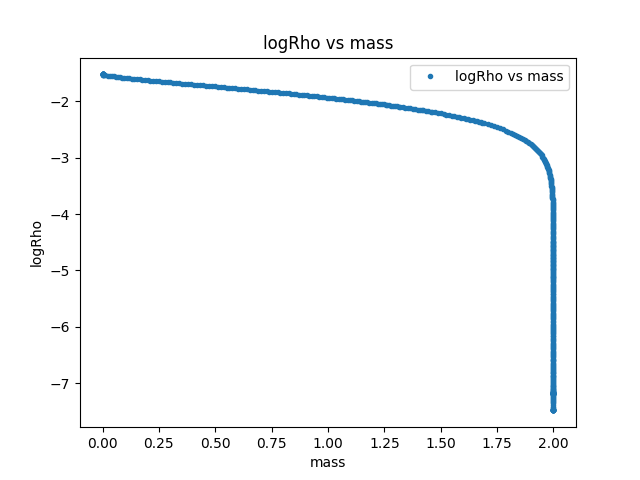

In [11]:
# here we may also plot arbitrary quantities against each other
ifig=4; figure(ifig)
p2.plot('mass','logRho')

<IPython.core.display.Javascript object>


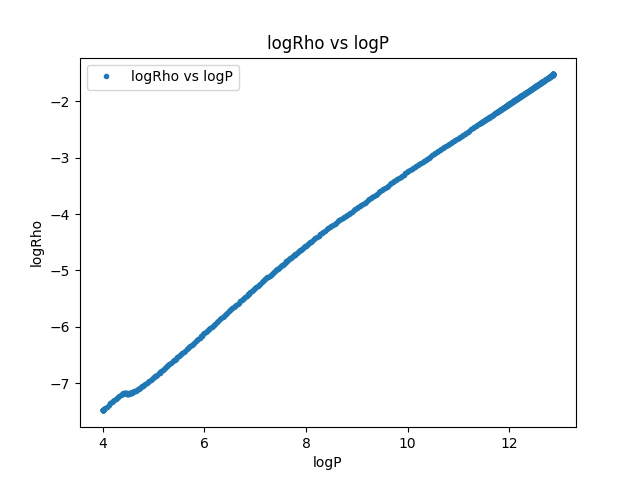

In [12]:
ifig=5; figure(ifig)
p2.plot('logP','logRho')

In [13]:
# Now integrate a adiabatic polytrope with estimated central conditions for the 
# radius and mass of this stellar model and see if 